In [16]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Aufgabe 1

Perzeptronklassifikator $f(x): R² \rightarrow \{0,1\}$ mit Parametern $w_0 = 2, w_1 = -0.4$ und $w_2 = 0.5$

### 1) Welches geometrische Objekt ist die Entscheidungsoberfläche?

Eine Gerade

### 2) Zeichnen Sie die Entscheidungsoberfläche und markieren Sie den Halbraum welcher positiv klassifiziert und welcher Halbraum negativ ist

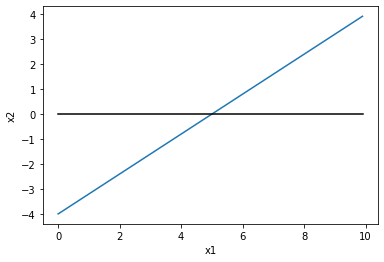

In [50]:
f = lambda x: -4 + 0.8 * x 
x_1 = np.arange(0.0, 10.0, 0.1)
x_2 = [f(x_i) for x_i in x_1]
plt.plot(x_1, x_2)
plt.plot(x_1, [0 for x_i in x_1], c="black")
plt.Polygon([[-4.0, 0.0], [10.0, 4.0], [-4.0, 4.0]], fill=True, closed=True, color='b')
plt.Polygon([[-4.0, 0.0], [10.0, 4.0], [10.0, -4.0]], fill=True, closed=True, color='r')
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

### 3) Was müssten Sie an $f(x)$ ändern um eine entgegengesetzte Klassifikation zu erhalten?

Vorzeichen der Gewichte $w_i$ umdrehen zu:

$f(x) = -2 + 0.4x_1 - 0.5x_2$

### 4) Berechnen Sie die Gewichte eines Perzeptronklassifikators, wenn Sie wissen, dass
- die Punkte (3,0) und (0,3) auf der Entscheidungsoberfläche liegen und dass
- der Ursprung (0,0) negativ klassifiziert wird

$w_0 + 3x_1 = 0 \Rightarrow w_0 = -3x_1$

$w_0 + 3x_2 = 0 \Rightarrow w_0 = -3x_2$

$w_0 < 0 \Rightarrow x_1 = x_2 = 1 \Rightarrow w_0 = -3$

$f(x_1, x_2) = -3 + x_1 + x_2$

## Aufgabe 2

$f(x): R² \rightarrow \{0, 1\} = \alpha(w_1x_1 + w_2x_2 + w_0)$

- $d¹ = [1,2]$ (Klasse 1)
- $d² = [2,3]$ (Klasse 0)
- $d³ = [2,0]$ (Klasse 1)

### 1) Zeichnen Sie die drei Datenpunkte in ein Koordinatensystem

In [ ]:
plt.scatter(1, 2, marker="D", s=15, color='blue')
plt.scatter(2, 3, marker="D", s=15, color='red')
plt.scatter(2, 0, marker="D", s=15, color='blue')
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

### 2) Angenommen die Gewichte sind anfangs $w = 0$, zeichnen Sie in das Koordinatensystem die Entscheidungsoberfläche ein

In [ ]:
plt.scatter(1, 2, marker="D", s=15, color='blue')
plt.scatter(2, 3, marker="D", s=15, color='red')
plt.scatter(2, 0, marker="D", s=15, color='blue')
plt.Polygon([[0.0, 0.0], [2.0, 0.0], [2.0, 3.0], [0.0, 3.0]], fill=True, closed=True, color='r')
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

### 3) Führen Sie das Training schrittweise durch bis alle Datenpunkte korrekt klassifiziert werden. Was ist der endgültige Wert von `w`? Wieviele Iterationen wurden benötigt?

In [35]:
alpha = lambda x: 1 if x > 0 else 0

def sum(x, y, w):
    s = 0.0
    for i in range(len(y)):
        nv = np.abs(y[i] - alpha(np.dot(w, x[i])))
        s += nv
    return s

def perceptron_learn(x, y):
    w = np.array([0] * len(y))
    err = lambda: (1.0 / len(y)) * sum(x, y, w)
    iters = 0
    while err() != 0.0:
        _w = w.copy()
        o = np.array([0] * len(y))
        for i in range(len(y)):
            o[i] = alpha(np.dot(w, x[i]))
            _w = _w + (y[i] - o[i]) * x[i]
        iters += 1

        w = _w
    return w, iters


In [36]:
x = np.array([
    [1.0, 1.0, 2.0],
    [1.0, 2.0, 3.0],
    [1.0, 2.0, 0.0]
])
y = np.array([
    1, 0, 1
])

w, iters = perceptron_learn(x, y)
print("W:", w, "\nIterations:", iters)

W: [ 8. -1. -2.] 
Iterations: 29


### 4) Zeichnen Sie nochmals die drei Datenpunkte in ein Koordinatensystem, zeichnen Sie die Entscheidungsoberfläche ebenfalls

$f(x_1, x_2) = 8 -x_1 -2x_2$

$8 - x_1 - 2x_2 = 0$

$\Leftrightarrow x_2 = 4 - 0.5x_1$

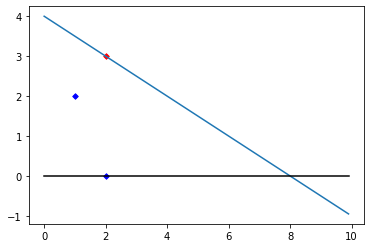

In [46]:
f = lambda x: 4 - 0.5 * x
x_1 = np.arange(0, 10, 0.1)
x_2 = [f(x) for x in x_1]
plt.plot(x_1, x_2)
plt.scatter(1, 2, marker="D", s=15, color='blue')
plt.scatter(2, 3, marker="D", s=15, color='red')
plt.scatter(2, 0, marker="D", s=15, color='blue')
plt.plot(x_1, [0 for x in x_1], color='black')
plt.show()

## Aufgabe 3 - `ex04_03.ipynb`